In [1215]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

from sklearn import model_selection   

from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

import re

from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
# Metrics for measuring our fit
from sklearn.metrics import mean_squared_error, accuracy_score

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier

# Remove warnings
import warnings
warnings.filterwarnings('ignore')


In [1216]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
ss = pd.read_csv("gender_submission.csv")

In [1217]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1218]:
#identfying the classification of data types 

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [1219]:
#missing data in training set
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [1220]:
#missing data in test set
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [1221]:
#summary of general data distribution of training set

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1222]:
# Summary of general data distrubtion of test set 

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [1223]:
# Value counts of the sex column

train['Sex'].value_counts(dropna = False)

# Comment: There are more male passengers than female passengers on titanic

male      577
female    314
Name: Sex, dtype: int64

In [1224]:
# Mean of survival by sex

train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [1225]:
# Value counts of the Pclass column 

train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [1226]:
# Mean of survival by passenger class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [1227]:
#survival probability decreases with class

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

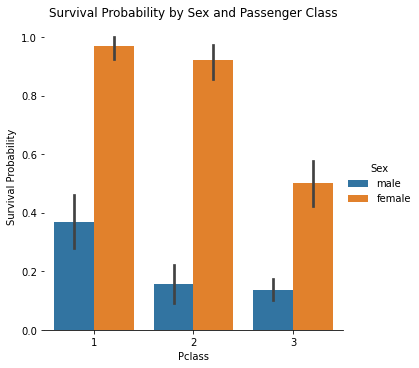

In [1228]:
# Survival by gender and passenger class

g = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

In [1229]:
# Value counts of the Embarked column 

train['Embarked'].value_counts(dropna = False)

# Comment: Two missing values in the Embarked column

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [1230]:
# Mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


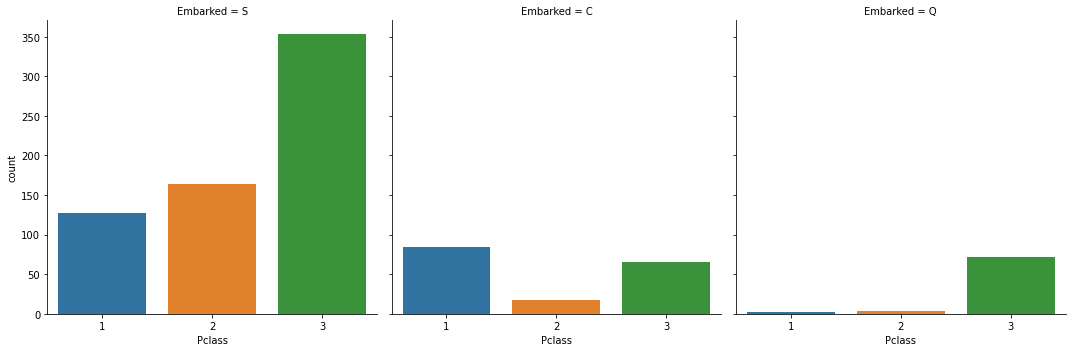

In [1231]:
sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count')

In [1232]:
''' #most first class passengers boarded S and C, since they have a high chance of survival the data points towards more people survivng boarding from C '''

' #most first class passengers boarded S and C, since they have a high chance of survival the data points towards more people survivng boarding from C '

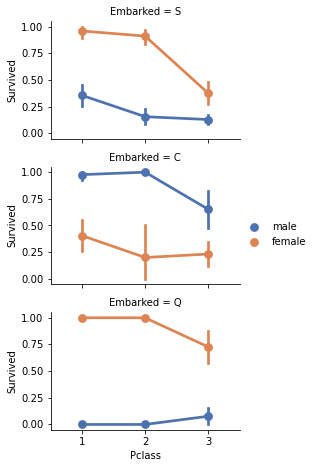

In [1233]:
# Survival probability by all categorical variables

grid = sns.FacetGrid(train, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

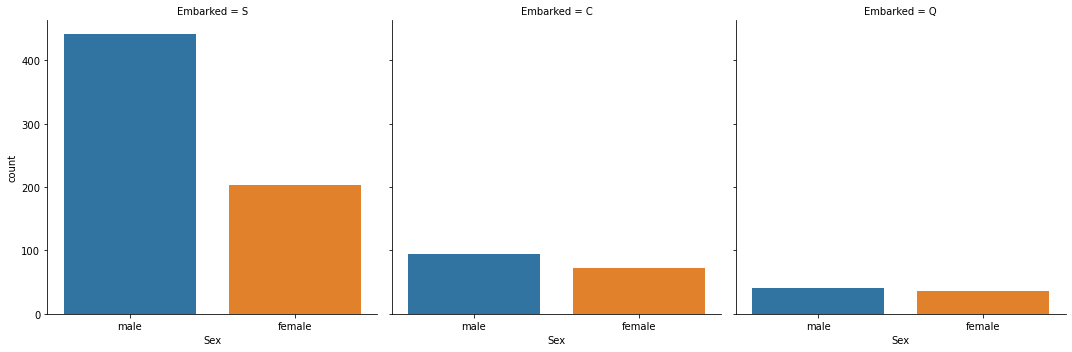

In [1234]:
sns.factorplot('Sex', col = 'Embarked', data = train, kind = 'count')

#men had a high rate o survival vs women if they boarded from C even when the count is not v different from femalesv 
#women had a high rate of survival vs men if they boarded from S even when they are 0.5x of men in number


In [1235]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [1236]:
# Outliers in numerical variables

train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [1237]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


<AxesSubplot:>

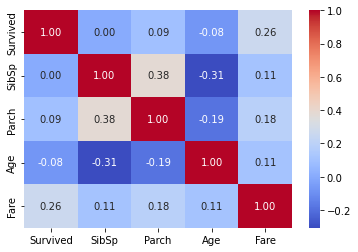

In [1238]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

# Comment: Fare seems to be the only feature that has a substantial correlation with survival

In [1239]:
# Null values of Fare column 

train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

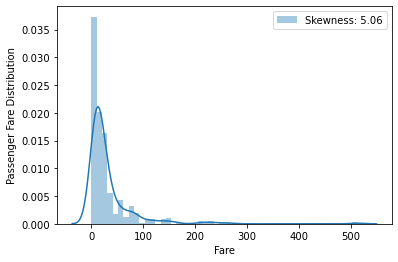

In [1240]:
# Passenger fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

In [1241]:
# Missing values in training set 

train.isnull().sum().sort_values(ascending = False)

Cabin          680
Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [1242]:
# Compute the most frequent value of Embarked in training set

mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [1243]:
# Fill missing value in Embarked with mode

train['Embarked'].fillna(mode, inplace = True)

In [1244]:
# Missing values in test set

test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [1245]:
# Compute mean of Fare in test set 

mean = test['Fare'].dropna().mean()
mean

35.6271884892086

In [1246]:
# Combine training set and test set

combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1247]:
#deck

combine.rename({'Cabin':'Deck'},axis=1,inplace=True)
combine['Deck'] = combine['Deck'].fillna('N')

def cabin_to_deck(row):
    return row['Deck'][0]

combine['Deck'] = combine.apply(cabin_to_deck,axis=1)

combine.head()

#ticket work

ticket_list = []
for ticket_id in list(combine['Ticket'].unique()):
    
    count = combine[combine['Ticket']==ticket_id].count()[0]
    decks = combine[combine['Ticket']==ticket_id]['Deck']
    empty_decks = (decks=='N').sum()
    
    if (count > 1) and (empty_decks > 0) and (empty_decks < len(decks)):
        ticket_list.append(ticket_id)

print(ticket_list)

# Show dataframes with the previous specifications
for ticket in ticket_list:
    display(combine[combine['Ticket']==ticket])



['2668', 'PC 17755', 'PC 17760', '19877', '113781', '17421', 'PC 17608', '36928', 'PC 17757', 'PC 17761', '24160', 'S.O./P.P. 3']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked
126,129,1.0,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F,C
526,534,1.0,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,N,C
1298,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,N,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked
253,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,N,C
672,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C
730,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C
1224,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked
264,270,1.0,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C,S
319,326,1.0,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C,C
366,374,0.0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,N,C
1195,1206,NaN,1,"White, Mrs. John Stuart (Ella Holmes)",female,55.0,0,0,PC 17760,135.6333,C,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked
285,291,1.0,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.85,N,S
734,742,0.0,1,"Cavendish, Mr. Tyrell William",male,36.0,1,0,19877,78.85,C,S
977,988,NaN,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.85,C,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked
292,298,0.0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C,S
300,306,1.0,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C,S
491,499,0.0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C,S
701,709,1.0,1,"Cleaver, Miss. Alice",female,22.00,0,0,113781,151.55,N,S
1022,1033,NaN,1,"Daniels, Miss. Sarah",female,33.00,0,0,113781,151.55,N,S
1187,1198,NaN,1,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.55,C,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked
301,307,1.0,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,N,C
543,551,1.0,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C,C
574,582,1.0,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C,C
691,699,0.0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked
306,312,1.0,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B,C
735,743,1.0,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B,C
905,916,NaN,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.375,B,C
940,951,NaN,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.375,B,C
945,956,NaN,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.375,B,C
1023,1034,NaN,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.375,B,C
1256,1267,NaN,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.375,N,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked
313,319,1.0,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C,S
847,857,1.0,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,N,S
1098,1109,NaN,1,"Wick, Mr. George Dennick",male,57.0,1,1,36928,164.8667,N,S
1281,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked
373,381,1.0,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.525,N,C
550,558,0.0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.525,N,C
693,701,1.0,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C,C
709,717,1.0,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,C,C
1083,1094,NaN,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.525,C,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked
530,538,1.0,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.425,N,C
537,545,0.0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.425,C,C
1120,1131,NaN,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0,1,0,PC 17761,106.425,C,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked
682,690,1.0,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B,S
723,731,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B,S
772,780,1.0,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B,S
1205,1216,NaN,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,N,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked
765,773,0.0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5,E,S
833,842,0.0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5,N,S


Pclass = 1 decks: ['C', 'E', 'A', 'N', 'B', 'D', 'T']
Pclass = 2 decks: ['N', 'D', 'F', 'E']
Pclass = 3 decks: ['N', 'G', 'F', 'E']
Pclass = 1 weights: [0.381 0.132 0.083 0.253 0.151]
Pclass = 2 weights: [0.25  0.542 0.208]
Pclass = 3 weights: [0.278 0.556 0.167]


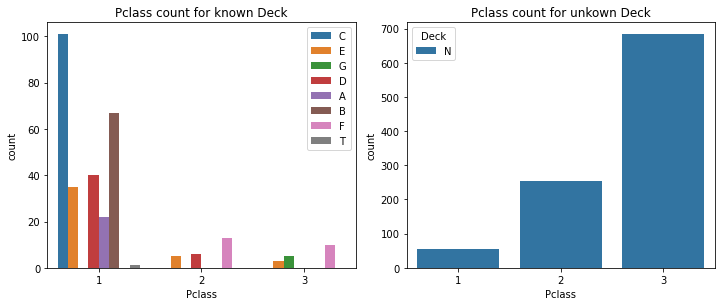

In [1248]:
# ticket ID, information

# 2668, 2 siblings (sharing with mother)
combine.at[526,'Deck']='F'
combine.at[1298,'Deck']='F'


# PC 17755, maid to Mrs. Cardeza
combine.at[253,'Deck']='B'

# PC 17760, manservant to Mrs White 
combine.at[366,'Deck']='C'

# 19877, maid to Mrs Cavendish
combine.at[285,'Deck']='C'

# 113781, maid and nurse to the Allisons
combine.at[701,'Deck']='C'
combine.at[1022,'Deck']='C'



# 17421, maid to Mrs Thayer
combine.at[301,'Deck']='C'

# PC 17608, governess (teacher) to Master Ryerson
combine.at[1256,'Deck']='B'

# 36928, parents (sharing with daughters)
combine.at[847,'Deck']='C'
combine.at[1098,'Deck']='C'


# PC 17757, maid and manservant to the Astors
combine.at[373,'Deck']='C'
combine.at[550,'Deck']='C'



# PC 17761, maid to Mrs Douglas, occupied room with another maid
combine.at[530,'Deck']='C'

# 24160, maid to Mrs. Robert, testimony that she was on deck E
combine.at[1205,'Deck']='E'

# S.O./P.P. 3, very little information, will assume on deck E with Mrs. Mack
combine.at[833,'Deck']='E'


#MORE WORK ON DECK

fig,ax = plt.subplots(1,2,figsize = (10,4))
plt.tight_layout(w_pad=2)
ax = ax.ravel()

sns.countplot(x='Pclass',data=combine[combine['Deck']!='N'],hue='Deck',ax=ax[0])
ax[0].legend(loc=1)
ax[0].set_title('Pclass count for known Deck')
sns.countplot(x='Pclass',data=combine[combine['Deck']=='N'],hue='Deck',ax=ax[1])
ax[1].set_title('Pclass count for unkown Deck')

# Convert Sex into numerical values where 0 = male and 1 = female

combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

#list

decks_by_class = [[],[],[]]
for i in range(3):
    decks_by_class[i] = list(combine[combine['Pclass']==i+1]['Deck'].unique())
    print(f'Pclass = {i+1} decks:',decks_by_class[i])

# Removing null ('N') entries and single 'T' cabin
for i in range(3):
    if 'N' in decks_by_class[i]:
        decks_by_class[i].remove('N')
    if 'T' in decks_by_class[i]:
        decks_by_class[i].remove('T')
        
weights_by_class = [[],[],[]]

for i,deck_list in enumerate(decks_by_class):
    for deck in deck_list:
        if i == 0:
            class_total = combine[(combine['Deck']!='N')&(combine['Pclass']==i+1)].count()[0]-1
        else:
            class_total = combine[(combine['Deck']!='N')&(combine['Pclass']==i+1)].count()[0]
        deck_total = combine[(combine['Deck']==deck)&(combine['Pclass']==i+1)].count()[0]
        weights_by_class[i].append(deck_total/class_total)
    print(f'Pclass = {i+1} weights:',np.round(weights_by_class[i],3))
    


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,F,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,G,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,G,S


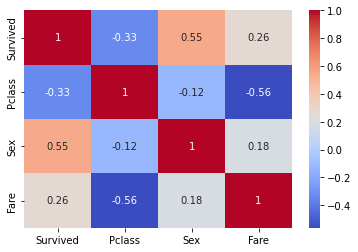

In [1249]:
sns.heatmap(combine.drop(['Name', 'PassengerId','Age','SibSp','Parch'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

# Store tickets that were already looped with cabin position
ticket_dict = {}

def impute_deck(row):
    
    ticket = row['Ticket']
    deck = row['Deck']
    pclass = row['Pclass']
    
    if (deck == 'N') and (ticket not in ticket_dict):
        
        if pclass == 1:
            deck = list(np.random.choice(decks_by_class[0],size=1,
                                         p=weights_by_class[0]))[0]
        elif pclass ==2:
            deck = list(np.random.choice(decks_by_class[1],size=1,
                                         p=weights_by_class[1]))[0]
        elif pclass == 3:
            deck = list(np.random.choice(decks_by_class[2],size=1,
                                         p=weights_by_class[2]))[0]
        
        ticket_dict[ticket] = deck
        
    elif (deck == 'N') and (ticket in ticket_dict):
        deck = ticket_dict[ticket]
    
    return deck

combine['Deck'] = combine.apply(impute_deck,axis=1)

combine.head()

In [1250]:
# Check number of missing ages 

age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)


256

In [1251]:
# Loop through list and impute missing ages

for index in age_nan_indices:
    mean_age = combine['Age'].mean()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].mean()
    if np.isnan(predict_age):
         combine['Age'].iloc[index] = mean_age  
    else:
        combine['Age'].iloc[index] = predict_age

In [1252]:
# Make sure there is no more missing ages 

combine['Age'].isnull().sum()

0

Text(0.5, 1.0, 'Passenger Fare Distribution')

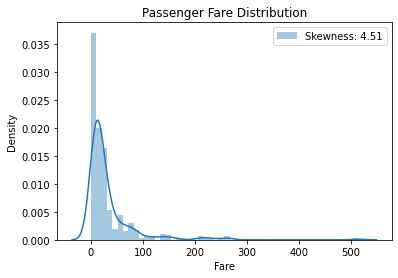

In [1253]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [1254]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)


Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

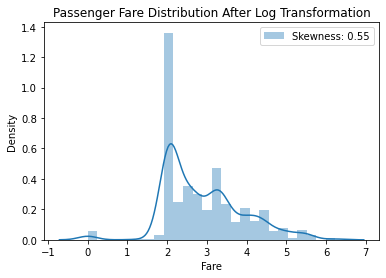

In [1255]:
# Passenger fare distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

In [1256]:
combine.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,F,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,G,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,C,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,G,S


In [1257]:
# Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [1258]:
# Value counts of Title

combine['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [1259]:
# Number of unique Title

combine['Title'].nunique()

18

In [1260]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

<AxesSubplot:xlabel='Title', ylabel='count'>

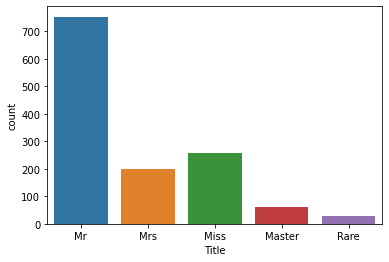

In [1261]:
sns.countplot(combine['Title'])


In [1262]:
# Mean of survival by name title

combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


In [1263]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Title
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,F,S,Mr
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C,C,Mrs
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,G,S,Miss
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C,S,Mrs
4,5,0.0,3,0,35.0,0,0,373450,2.085672,G,S,Mr


In [1264]:
# Calculate family size from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [1265]:
# Mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [1266]:
# Create IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [1267]:
# Mean of survival by IsAlone

combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [1268]:
# Drop SibSp, Parch and FamilySize features from combine dataframe
combine = combine.drop(['SibSp'], axis = 1)
combine = combine.drop(['Parch'], axis = 1)
combine = combine.drop('FamilySize', axis = 1)


combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Deck,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,A/5 21171,1.981001,F,S,Mr,0
1,2,1.0,1,1,38.0,PC 17599,4.266662,C,C,Mrs,0
2,3,1.0,3,1,26.0,STON/O2. 3101282,2.070022,G,S,Miss,1
3,4,1.0,1,1,35.0,113803,3.972177,C,S,Mrs,0
4,5,0.0,3,0,35.0,373450,2.085672,G,S,Mr,1


In [1269]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Pclass'])

combine.head()

,PassengerId,Survived,Sex,Age,Ticket,Fare,Deck,Embarked,Title,IsAlone,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,0,22.0,A/5 21171,1.981001,F,S,Mr,0,0,0,1
1,2,1.0,1,38.0,PC 17599,4.266662,C,C,Mrs,0,1,0,0
2,3,1.0,1,26.0,STON/O2. 3101282,2.070022,G,S,Miss,1,0,0,1
3,4,1.0,1,35.0,113803,3.972177,C,S,Mrs,0,1,0,0
4,5,0.0,0,35.0,373450,2.085672,G,S,Mr,1,0,0,1


In [1270]:
# Divide Fare into four bands

combine = pd.get_dummies(combine, columns = ['Embarked'])
combine = pd.get_dummies(combine, columns = ['Title'])




combine['FareBand'] = pd.cut(combine['Fare'], 8)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 0.78]",0.066667
1,"(0.78, 1.56]",0.000000
2,"(1.56, 2.34]",0.205607
3,"(2.34, 3.119]",0.420792
4,"(3.119, 3.899]",0.420213
5,"(3.899, 4.679]",0.688679
6,"(4.679, 5.459]",0.750000
7,"(5.459, 6.239]",0.750000


In [1271]:
# Assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 2.34), 'Fare'] = 1
combine.loc[(combine['Fare'] > 2.34) & (combine['Fare'] <= 3.119), 'Fare'] = 2
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 3.899), 'Fare'] = 3
combine.loc[(combine['Fare'] > 3.899) & (combine['Fare'] <= 4.679), 'Fare'] = 4
combine.loc[(combine['Fare'] > 4.679) & (combine['Fare'] <= 5.459), 'Fare'] = 5
combine.loc[(combine['Fare'] > 5.459) & (combine['Fare'] <= 6.239), 'Fare'] = 6
combine.loc[combine['Fare'] > 6.239, 'Fare'] = 7

# Convert Fare into integer

combine['Fare'] = combine['Fare'].astype(int)
combine = pd.get_dummies(combine, columns = ['Deck'])


combine.head()






,PassengerId,Survived,Sex,Age,Ticket,Fare,IsAlone,Pclass_1,Pclass_2,Pclass_3,...,Title_Rare,FareBand,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,1,0.0,0,22.0,A/5 21171,1,0,0,0,1,...,0,"(1.56, 2.34]",0,0,0,0,0,1,0,0
1,2,1.0,1,38.0,PC 17599,4,0,1,0,0,...,0,"(3.899, 4.679]",0,0,1,0,0,0,0,0
2,3,1.0,1,26.0,STON/O2. 3101282,1,1,0,0,1,...,0,"(1.56, 2.34]",0,0,0,0,0,0,1,0
3,4,1.0,1,35.0,113803,4,0,1,0,0,...,0,"(3.899, 4.679]",0,0,1,0,0,0,0,0
4,5,0.0,0,35.0,373450,1,1,0,0,1,...,0,"(1.56, 2.34]",0,0,0,0,0,0,1,0


In [1272]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)
combine = combine.drop('Ticket', axis = 1)



In [1273]:
combine['Age'] = combine['Age'].astype('int')
combine.head(30)

combine.loc[combine['Age'] <= 2, 'Age'] = 0
combine.loc[(combine['Age'] > 2) & (combine['Age'] <= 4), 'Age'] = 1
combine.loc[(combine['Age'] > 4) & (combine['Age'] <= 13), 'Age'] = 2
combine.loc[(combine['Age'] > 13) & (combine['Age'] <= 20), 'Age'] = 3
combine.loc[(combine['Age'] > 20) & (combine['Age'] <= 35), 'Age'] = 4
combine.loc[(combine['Age'] > 35) & (combine['Age'] <= 55), 'Age'] = 5
combine.loc[combine['Age'] > 55 , 'Age'] = 6


combine['Age'].dtype





dtype('int32')

In [1274]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [1275]:
test.head(30)





,PassengerId,Survived,Sex,Age,Fare,IsAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,Title_Mrs,Title_Rare,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
881,892,NaN,0,4,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
882,893,NaN,1,5,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
883,894,NaN,0,6,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
884,895,NaN,0,4,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
885,896,NaN,1,4,2,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
886,897,NaN,0,3,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
887,898,NaN,1,4,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
888,899,NaN,0,4,3,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
889,900,NaN,1,3,1,1,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
890,901,NaN,0,4,3,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [1276]:
# Drop passenger ID column from and training set

train = train.drop('PassengerId', axis = 1)
test.head()

,PassengerId,Survived,Sex,Age,Fare,IsAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,Title_Mrs,Title_Rare,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
881,892,NaN,0,4,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
882,893,NaN,1,5,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
883,894,NaN,0,6,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
884,895,NaN,0,4,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
885,896,NaN,1,4,2,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [1277]:
# Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Sex,Age,Fare,IsAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,Title_Mrs,Title_Rare,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0,0,4,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,5,4,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,1,1,4,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,4,4,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,4,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1278]:
train.head()


,Survived,Sex,Age,Fare,IsAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,Title_Mrs,Title_Rare,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0,0,4,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,5,4,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,1,1,4,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,4,4,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,4,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1279]:
# Drop passenger survived column from test set

test = test.drop('Survived', axis = 1)
test.head()




,PassengerId,Sex,Age,Fare,IsAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,Title_Mrs,Title_Rare,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
881,892,0,4,1,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
882,893,1,5,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
883,894,0,6,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
884,895,0,4,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
885,896,1,4,2,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [1280]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 23)
Y_train shape:  (881,)
X_test shape:  (418, 23)


In [1281]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log


81.95

In [1282]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

81.27

In [1283]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.47

In [1284]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian


69.47

In [1285]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

63.0

In [1286]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

81.04

In [1287]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.48

In [1288]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

90.35

In [1293]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest



90.35

In [1294]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.00976
0:	learn: 0.6869115	total: 1.98ms	remaining: 1.98s
1:	learn: 0.6821227	total: 4.13ms	remaining: 2.06s
2:	learn: 0.6753866	total: 6.16ms	remaining: 2.05s
3:	learn: 0.6698296	total: 8.16ms	remaining: 2.03s
4:	learn: 0.6631943	total: 10.1ms	remaining: 2.02s
5:	learn: 0.6567435	total: 12.3ms	remaining: 2.03s
6:	learn: 0.6505058	total: 14.3ms	remaining: 2.04s
7:	learn: 0.6452172	total: 16.5ms	remaining: 2.04s
8:	learn: 0.6391316	total: 19.2ms	remaining: 2.12s
9:	learn: 0.6346438	total: 21.9ms	remaining: 2.17s
10:	learn: 0.6296217	total: 24ms	remaining: 2.16s
11:	learn: 0.6243981	total: 25.5ms	remaining: 2.1s
12:	learn: 0.6205198	total: 27.3ms	remaining: 2.07s
13:	learn: 0.6160838	total: 29.4ms	remaining: 2.07s
14:	learn: 0.6105709	total: 31.6ms	remaining: 2.08s
15:	learn: 0.6064614	total: 33.7ms	remaining: 2.07s
16:	learn: 0.6010883	total: 35.8ms	remaining: 2.07s
17:	learn: 0.5961758	total: 38.5ms	remaining: 2.1s
18:	learn: 0.5915684	total: 42.1ms	remaining: 2.1

In [1295]:
acc_catboost



87.85

In [1296]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,90.35
1,Decision Tree,90.35
2,CatBoost,87.85
3,KNN,85.47
4,Logistic Regression,81.95
5,Support Vector Machines,81.27
6,Stochastic Gradient Decent,81.04
7,Linear SVC,80.48
8,Naive Bayes,69.47
9,Perceptron,63.00


In [1297]:
 

# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [1298]:
# Create a list which contains cross validation results for each classifier

#K-fold Cross-Validation is when the dataset is split into a K number 
# of folds and is used to evaluate the model's ability when given new data. 

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6872121	total: 1.77ms	remaining: 1.76s
1:	learn: 0.6826874	total: 3.7ms	remaining: 1.85s
2:	learn: 0.6770456	total: 4.9ms	remaining: 1.63s
3:	learn: 0.6707307	total: 6.66ms	remaining: 1.66s
4:	learn: 0.6644887	total: 8.46ms	remaining: 1.68s
5:	learn: 0.6605553	total: 9.56ms	remaining: 1.58s
6:	learn: 0.6554948	total: 11.4ms	remaining: 1.61s
7:	learn: 0.6495043	total: 13.3ms	remaining: 1.65s
8:	learn: 0.6438522	total: 15.2ms	remaining: 1.68s
9:	learn: 0.6397519	total: 17.1ms	remaining: 1.69s
10:	learn: 0.6350142	total: 19ms	remaining: 1.71s
11:	learn: 0.6304583	total: 20.8ms	remaining: 1.72s
12:	learn: 0.6274840	total: 21.9ms	remaining: 1.66s
13:	learn: 0.6242195	total: 22.8ms	remaining: 1.61s
14:	learn: 0.6185664	total: 24.5ms	remaining: 1.61s
15:	learn: 0.6144664	total: 26.2ms	remaining: 1.61s
16:	learn: 0.6101419	total: 28ms	remaining: 1.62s
17:	learn: 0.6053770	total: 29.7ms	remaining: 1.62s
18:	learn: 0.6020934	total: 31.1ms	remaining: 1.61

In [1299]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [1300]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.817275,0.044036,CatBoost
1,0.812743,0.036554,Logistic Regression
2,0.805937,0.036935,Random Forest
3,0.805899,0.030273,Support Vector Machines
4,0.804801,0.037755,Linear SVC
5,0.804788,0.045008,KNN
6,0.779839,0.032659,Decision Tree
7,0.773072,0.045715,Stochastic Gradient Descent
8,0.752579,0.061456,Perceptron
9,0.699234,0.044734,Gausian Naive Bayes


In [1301]:
#Hyperparameter tuning is the process of tuning the parameters of a model. 
# Here I will tune the parameters of support vector classifier using GridSearchCV.

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.614 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.619 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.830 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.701 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [1302]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best estimator:  SVC(C=1, gamma=0.1)


In [1303]:
# Training accuracy

svc = SVC(C = 1, gamma = 0.1, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc 

84.11

In [1304]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1305]:
len(Y_pred)

418

In [1306]:
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [1307]:
# Create and save csv file 

submit.to_csv("submit.csv", index = False)